## ANDRIANIRINA Mifidy Ny Fanantenana ETU000803

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_column', 23)

In [ ]:
data = pd.read_csv("property24_data.csv")

In [ ]:
data.head()

,Bathrooms,Bedrooms,Erf Size,Floor Size,Garages,Listing Date,Listing Number,Pet Friendly,Price,Town,Type of Property,Garden,Pool,Secure Parking,Parking,No Pets Allowed,Furnished,Flatlet,Fibre Internet,Furnished (Optional),ADSL Internet,Satellite Internet,Fixed WiMax Internet
0,3.0,3.0,304 m²,326 m²,2.0,10 July 2020,108859219,1.0,6480000.0,"Tokai, Cape Town",House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,3.0,NaN,140 m²,2.0,23 September 2020,109153971,1.0,6250000.0,"14 Graham Road, Sea Point, Cape Town",Townhouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,4.0,659 m²,300 m²,2.0,23 September 2020,109154367,NaN,13950000.0,"Camps Bay, Cape Town",House,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,NaN,NaN,NaN,23 September 2020,109154455,NaN,1050000.0,"Ottery, Cape Town",Apartment / Flat,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,NaN,61 m²,NaN,23 July 2020,108907258,NaN,1265000.0,"Muizenberg, Cape Town",Apartment / Flat,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
##nombre de ligne et nombre de colonne
data.shape

(7901, 23)

# Analyse de forme
- **Target variable**      : Price
- **Taille**               : 7901 lignes et 23 colonnes
- **Types de variables**   : qualitatives : 3(non binaire), 11(binaire), quantitatives: 9 
- **Valeur manquantes**    : Il y a beaucoup de valeur manquante

# Analyse de fond
## Signification des variables 
- **Variable binaire**    : Garden, Pool, Pet Friendly, No pets allowed, Fibre Internet, Flatlet, Furnished,ADSL Internet, Furnished (Optional), Satellite Internet, Fixed WiMax Internet
- **Variable Town**       : beaucoup de Town
### Relation target / variable
- **Price / Town**       : le prix ne depend pas du Town

# Analyse detaillee
### Relation variable / variable
- **Floor Size/Bathrooms/Bedrooms**: tres correlees: +0.75
- **Floor Size/Price**: tres correlees: +0.67
- **Erf Size/Price**: tres correlees: +0.75
- **NaN**: beaucoup de NaN beaucoup de Nan dans secure parking

## Analyse de la forme des donnees

In [ ]:
data.shape #7901 ligne et 23 colonne

(7901, 23)

In [ ]:
data.dtypes

Bathrooms               float64
Bedrooms                float64
Erf Size                 object
Floor Size               object
Garages                 float64
Listing Date             object
Listing Number            int64
Pet Friendly            float64
Price                   float64
Town                     object
Type of Property         object
Garden                  float64
Pool                    float64
Secure Parking          float64
Parking                 float64
No Pets Allowed         float64
Furnished               float64
Flatlet                 float64
Fibre Internet          float64
Furnished (Optional)    float64
ADSL Internet           float64
Satellite Internet      float64
Fixed WiMax Internet    float64
dtype: object

In [ ]:
data.dtypes.value_counts()

float64    17
object      5
int64       1
dtype: int64

<AxesSubplot:ylabel='None'>

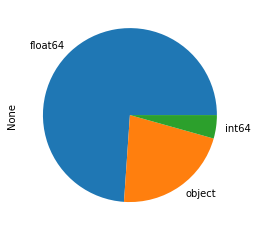

In [ ]:
data.dtypes.value_counts().plot.pie() #Il n'y a que 5 colonne de variable qualitatif, le reste est quantitatif

<AxesSubplot:>

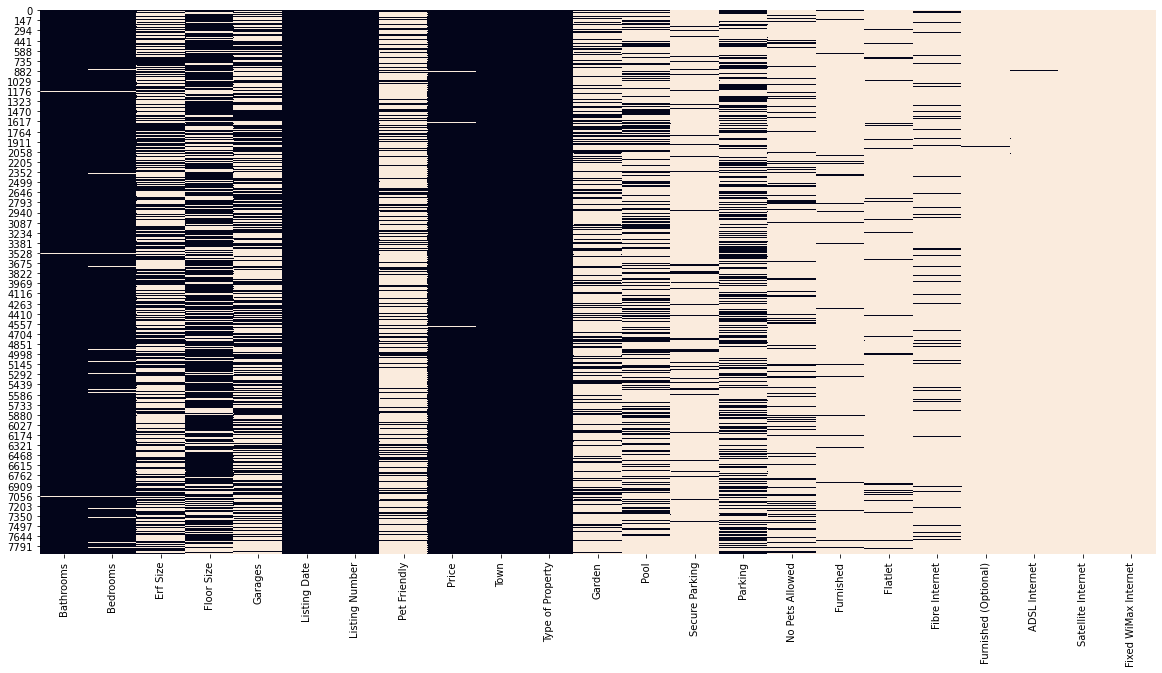

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False) #Il y a beaucoup de NaN

In [ ]:
(data.isna().sum() / data.shape[0]).sort_values(ascending=True)

Listing Date            0.000000
Listing Number          0.000000
Town                    0.000000
Type of Property        0.000000
Price                   0.006961
Bathrooms               0.011264
Bedrooms                0.030376
Floor Size              0.257183
Garages                 0.527655
Erf Size                0.539932
Parking                 0.566764
Pool                    0.653462
Garden                  0.743070
Pet Friendly            0.743577
No Pets Allowed         0.833059
Fibre Internet          0.899380
Secure Parking          0.915707
Flatlet                 0.947602
Furnished               0.962157
ADSL Internet           0.994937
Furnished (Optional)    0.997216
Satellite Internet      0.998481
Fixed WiMax Internet    0.999873
dtype: float64

### Retirer colonne surement inutile

In [ ]:
data = data.drop('Listing Date', axis=1)
data = data.drop('Listing Number', axis=1)

## remplir les cases vide logique

<AxesSubplot:xlabel='Price', ylabel='Count'>

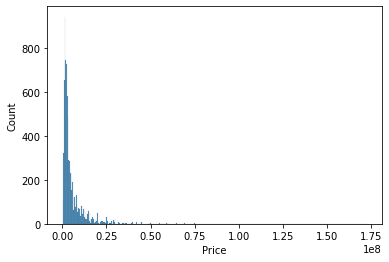

In [ ]:
sns.histplot(data=data, x='Price')

In [ ]:
def unityOfMeasure(df):
  allTypes = set()
  for size in df:
    str_size = str(size)
    splited = str_size.rsplit(' ', 1)
    if(len(splited) > 1):
      allTypes.add(splited[1])
  return allTypes

In [ ]:
unityOfMeasure(data['Floor Size'])

{'m²'}

In [ ]:
unityOfMeasure(data['Erf Size'])

{'ha', 'm²'}

In [ ]:
def removeUnit(col):
    newCol = []
    #i = 0
    for size in col:
        str_value = str(size)
        val_unity = str_value.rsplit(' ', 1)
        val = float(val_unity[0].replace(' ',''))
        if len(val_unity) == 2:
          if val_unity[1] == 'ha':
            newCol.append(val * 10000)
          else:
            newCol.append(val)
        else:
          newCol.append(val)
        #i = i + 1
    return newCol

In [ ]:
data['Floor Size'] = removeUnit(data['Floor Size'])
data['Erf Size'] = removeUnit(data['Erf Size'])

In [ ]:
data['Floor Size']

0       326.0
1       140.0
2       300.0
3         NaN
4        61.0
        ...  
7896      NaN
7897    120.0
7898    225.0
7899    126.0
7900      NaN
Name: Floor Size, Length: 7901, dtype: float64

In [ ]:
data['Erf Size']

0        304.0
1          NaN
2        659.0
3          NaN
4          NaN
         ...  
7896     140.0
7897    1100.0
7898       NaN
7899     116.0
7900     214.0
Name: Erf Size, Length: 7901, dtype: float64

In [ ]:
data.dtypes

Bathrooms               float64
Bedrooms                float64
Erf Size                float64
Floor Size              float64
Garages                 float64
Pet Friendly            float64
Price                   float64
Town                     object
Type of Property         object
Garden                  float64
Pool                    float64
Secure Parking          float64
Parking                 float64
No Pets Allowed         float64
Furnished               float64
Flatlet                 float64
Fibre Internet          float64
Furnished (Optional)    float64
ADSL Internet           float64
Satellite Internet      float64
Fixed WiMax Internet    float64
dtype: object

In [ ]:
data['Garden'] = data['Garden'].fillna(value=0)

In [ ]:
data['Pool'] = data['Pool'].fillna(value=0)

In [ ]:
data['Pet Friendly'] = data['Pet Friendly'].fillna(value=0)

In [ ]:
data['No Pets Allowed'] = data['No Pets Allowed'].fillna(value=0)

In [ ]:
data['Fibre Internet'] = data['Fibre Internet'].fillna(value=0)

In [ ]:
data['Flatlet'] = data['Flatlet'].fillna(value=0)

In [ ]:
data['Furnished'] = data['Furnished'].fillna(value=0)

In [ ]:
data['ADSL Internet'] = data['ADSL Internet'].fillna(value=0)

In [ ]:
data['Furnished (Optional)'] = data['Furnished (Optional)'].fillna(value=0)

In [ ]:
data['Satellite Internet'] = data['Satellite Internet'].fillna(value=0)

In [ ]:
data['Fixed WiMax Internet'] = data['Fixed WiMax Internet'].fillna(value=0)

In [ ]:
data['Secure Parking'] = data['Secure Parking'].fillna(value=0)

In [ ]:
data['Parking'] = data['Parking'].fillna(value=0)

In [ ]:
data['Garages'] = data['Garages'].fillna(value=0)

In [ ]:
data['Bathrooms'] = data['Bathrooms'].fillna(value=0)

In [ ]:
data['Bedrooms'] = data['Bedrooms'].fillna(value=0)

In [ ]:
binary_columns = [
    'Garden',
    'Pool',
    'Pet Friendly',
    'No Pets Allowed',
    'Fibre Internet',
    'Flatlet',
    'Furnished',
    'ADSL Internet',
    'Furnished (Optional)',
    'Satellite Internet',
    'Fixed WiMax Internet'
]

In [ ]:
qualitative_columns = [
    'Town',
    'Type of Property'
]

In [ ]:
quantitative_columns = [
    'Bathrooms',
    'Bedrooms',
    'Erf Size',
    'Floor Size',
    'Garages',
    'Secure Parking',
    'Parking',
    'Price'
]

In [ ]:
target_column = ['Price']

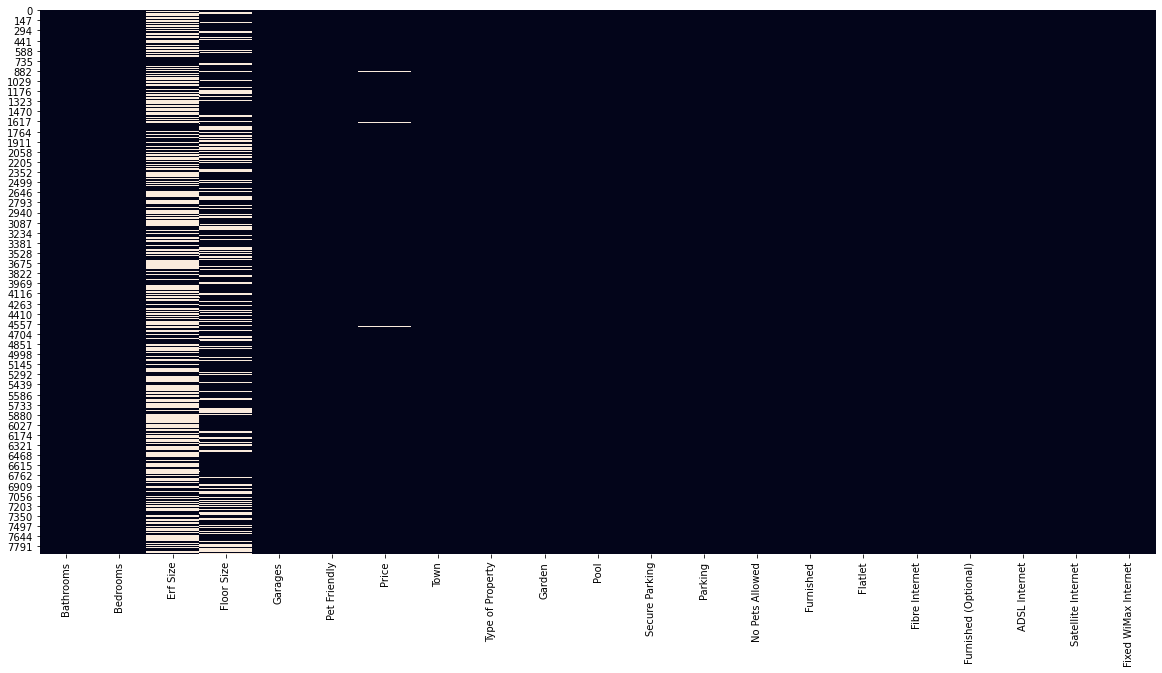

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

   ## Histogrames des variables continues

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

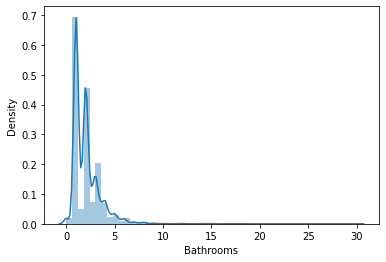

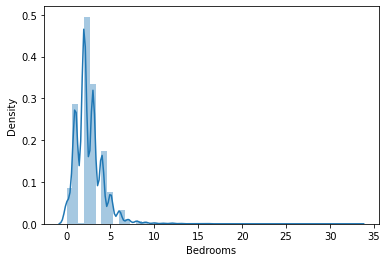

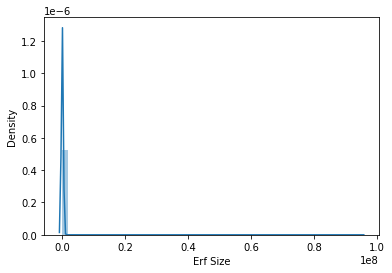

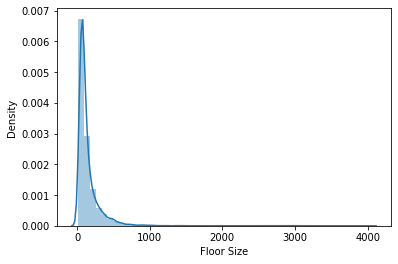

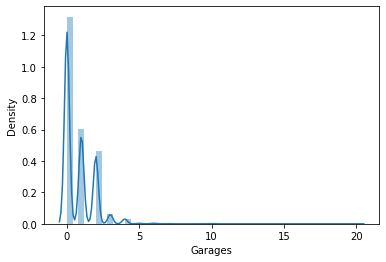

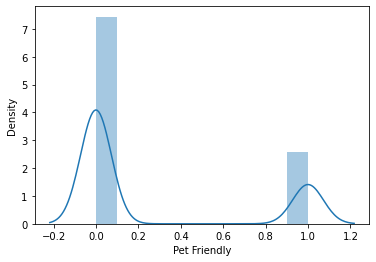

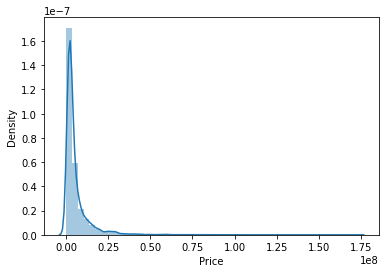

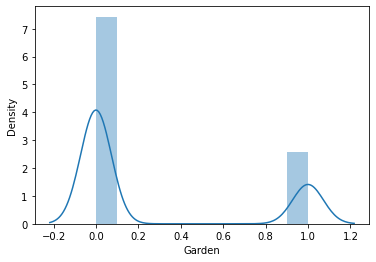

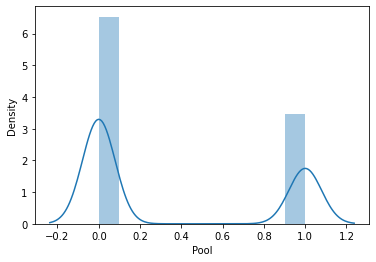

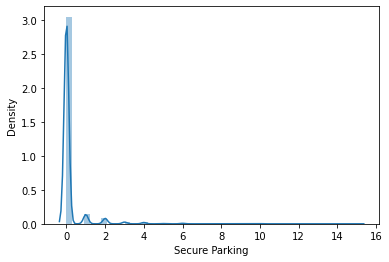

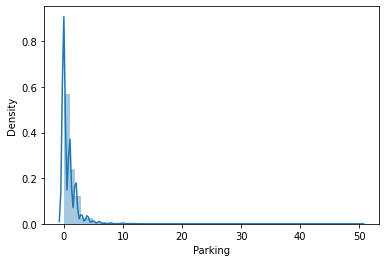

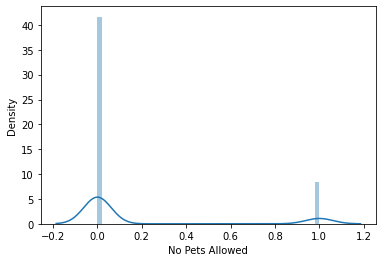

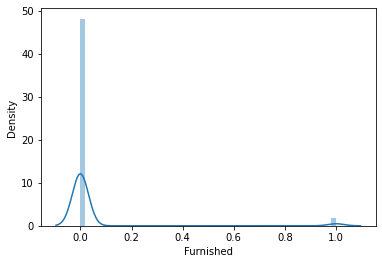

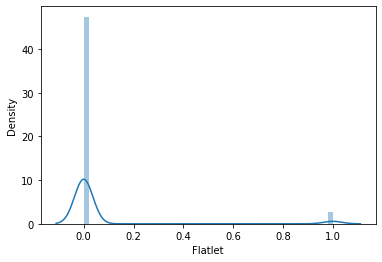

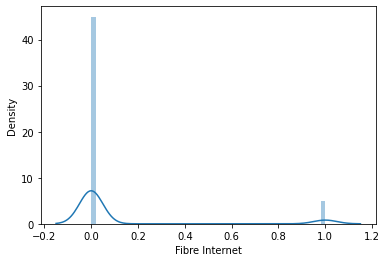

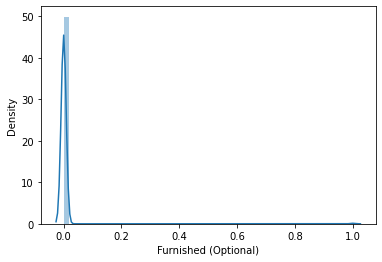

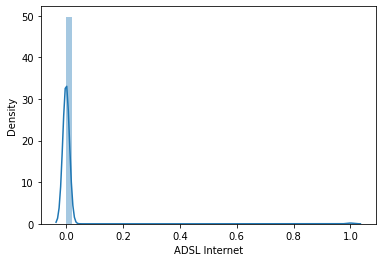

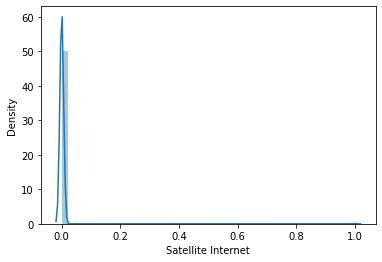

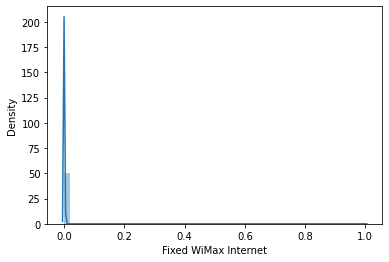

In [ ]:
for col in data.select_dtypes('float'):
    plt.figure()
    sns.distplot(data[col])

## variable discretes

In [ ]:
for col in data.select_dtypes('object'):
    print(f'{col :-<20} {data[col].unique()}')

Town---------------- ['Tokai, Cape Town' '14 Graham Road, Sea Point, Cape Town'
 'Camps Bay, Cape Town' ... '203 Lochinvar, Tamboerskloof, Cape Town'
 '19 Coventry Road, Woodstock, Cape Town'
 '36 Oliehout Street, Bonteheuwel, Cape Town']
Type of Property---- ['House' 'Townhouse' 'Apartment / Flat']


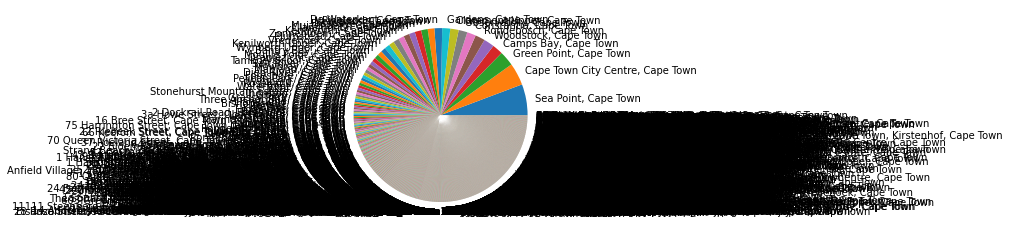

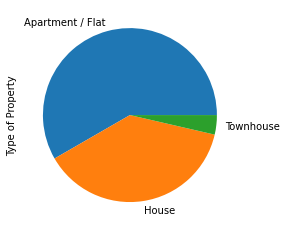

In [ ]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

## Relation variable / target

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


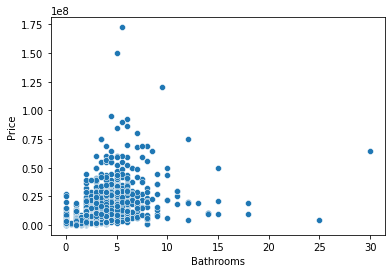

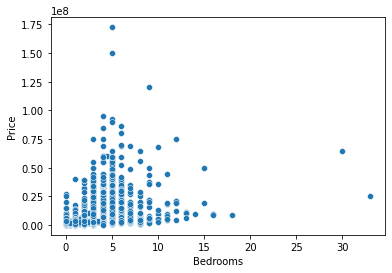

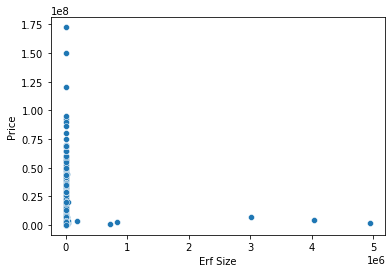

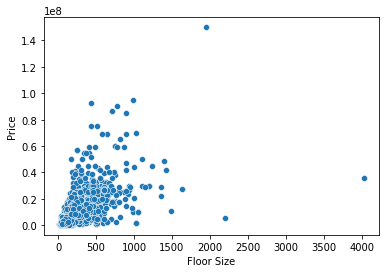

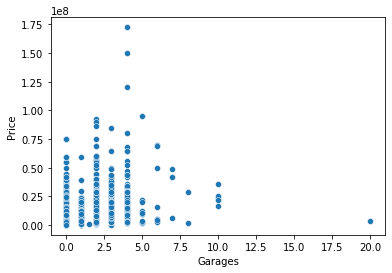

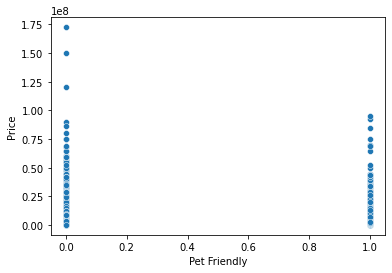

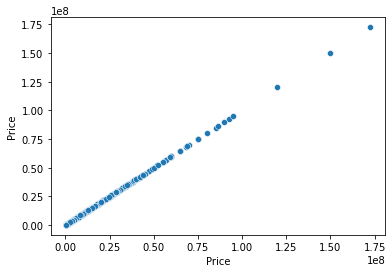

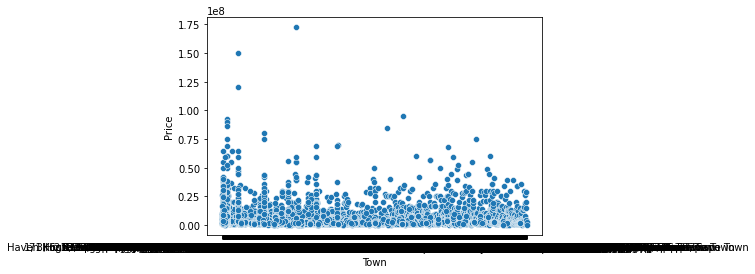

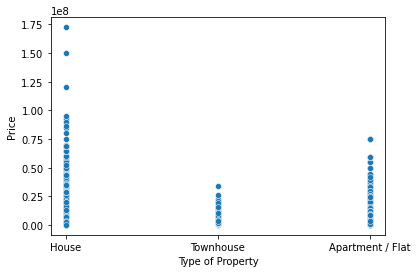

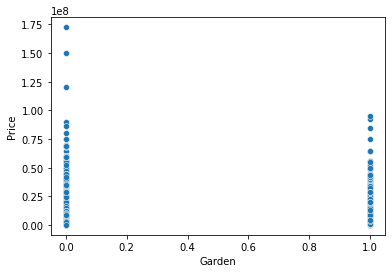

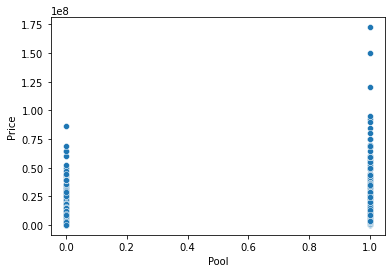

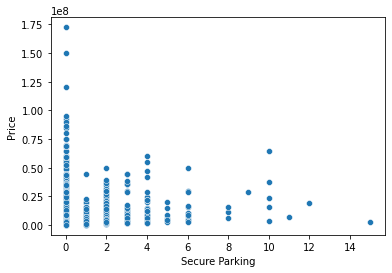

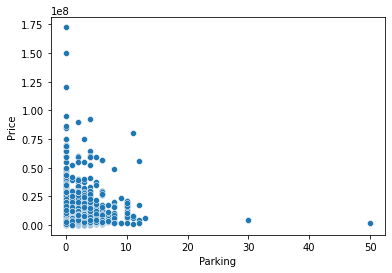

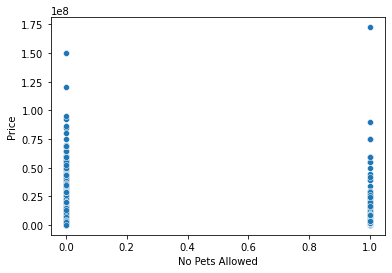

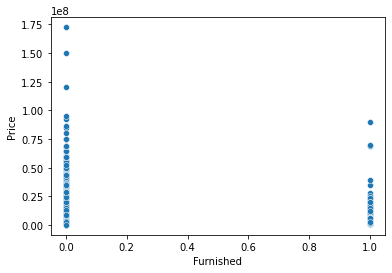

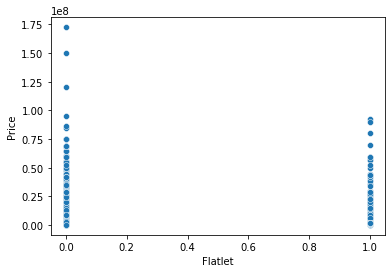

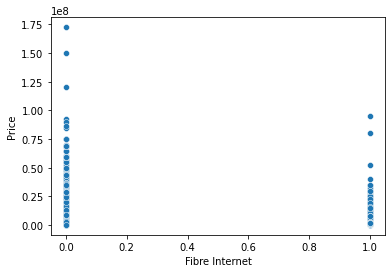

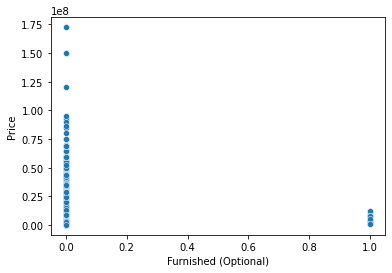

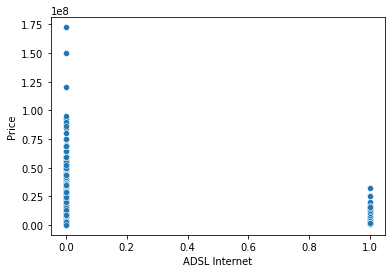

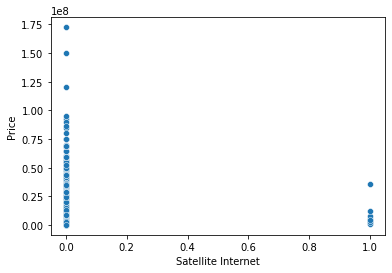

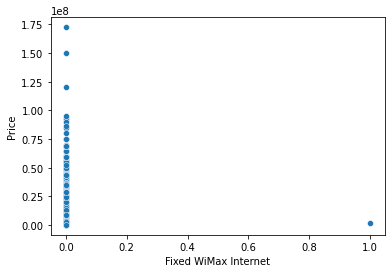

In [ ]:
for col in data:
    plt.figure()
    sns.scatterplot(y="Price", x=col, data=data)

## Relation variable variable

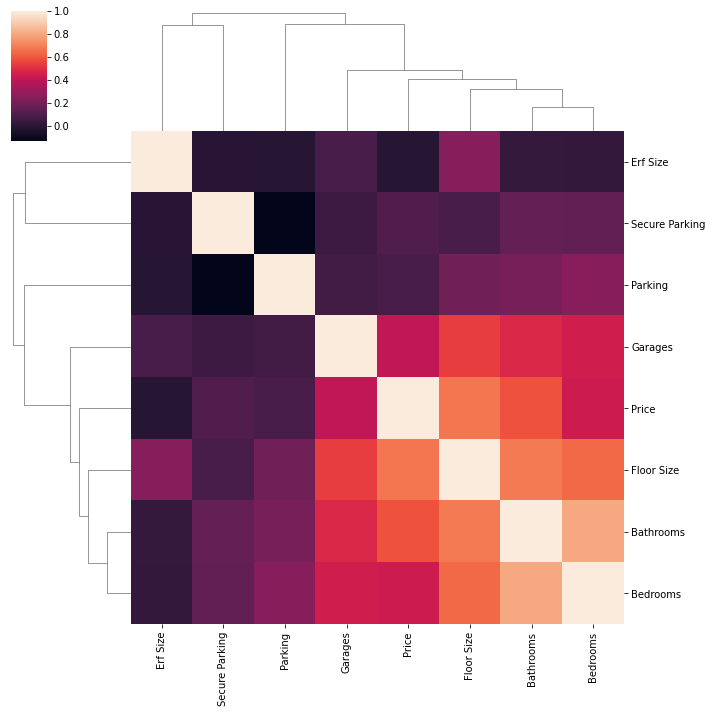

In [ ]:
sns.clustermap(data[quantitative_columns].corr())

In [ ]:
data[quantitative_columns].corr()['Price'].sort_values()

Erf Size         -0.007885
Parking           0.268624
Secure Parking    0.371979
Bedrooms          0.437259
Garages           0.442069
Bathrooms         0.596821
Floor Size        0.678998
Price             1.000000
Name: Price, dtype: float64

In [ ]:
data.count()

Bathrooms               7901
Bedrooms                7661
Erf Size                3635
Floor Size              5869
Garages                 7901
Pet Friendly            7901
Price                   7846
Town                    7901
Type of Property        7901
Garden                  7901
Pool                    7901
Secure Parking          7901
Parking                 7901
No Pets Allowed         7901
Furnished               7901
Flatlet                 7901
Fibre Internet          7901
Furnished (Optional)    7901
ADSL Internet           7901
Satellite Internet      7901
Fixed WiMax Internet    7901
dtype: int64

## Train test - nettoyage - encodage

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
data1 = data.copy()

In [ ]:
data1.shape

(7901, 21)

In [ ]:
train_set, test_set = train_test_split(data1, test_size=0.2, random_state = 0)

In [ ]:
encoder = OneHotEncoder()
new_cols = encoder.fit_transform(train_set[["Type of Property"]])
test_df = encoder.transform(test_set[["Type of Property"]])

In [ ]:
data1["Type of Property"].value_counts()

Apartment / Flat    4608
House               3008
Townhouse            285
Name: Type of Property, dtype: int64

In [ ]:
new_cols_df = pd.DataFrame(new_cols.todense(), columns=["Property_Apartment","Property_House","Property_Townhouse"])
new_test_cols_df = pd.DataFrame(test_df.todense(), columns=["Property_Apartment","Property_House","Property_Townhouse"])

In [ ]:
new_train_set = train_set.drop(["Town"], axis = 1)
new_test_set = test_set.drop(["Town"], axis = 1)

In [ ]:
new_train_set = pd.concat([new_train_set.drop(["Type of Property"], axis = 1), new_cols_df], axis=1).dropna()
new_test_set = pd.concat([new_test_set.drop(["Type of Property"], axis = 1), new_test_cols_df], axis=1).dropna()

In [ ]:
new_train_set

,Bathrooms,Bedrooms,Erf Size,Floor Size,Garages,Pet Friendly,Price,Garden,Pool,Secure Parking,Parking,No Pets Allowed,Furnished,Flatlet,Fibre Internet,Furnished (Optional),ADSL Internet,Satellite Internet,Fixed WiMax Internet,Property_Apartment,Property_House,Property_Townhouse
0,3.0,3.0,304.0,326.0,2.0,1.0,6480000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.5,4.0,659.0,300.0,2.0,0.0,13950000.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,8.0,8.0,2842.0,650.0,3.0,1.0,20000000.0,1.0,1.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16,2.0,2.0,281.0,140.0,1.0,1.0,4950000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,2.0,2.0,209.0,106.0,1.0,0.0,2500000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6288,2.0,2.0,737.0,136.0,0.0,0.0,7900000.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6293,4.0,4.0,930.0,433.0,2.0,0.0,29995000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6299,4.5,4.0,712.0,541.0,2.0,0.0,13595000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6307,3.0,5.0,397.0,137.0,0.0,1.0,2100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
new_test_set

,Bathrooms,Bedrooms,Erf Size,Floor Size,Garages,Pet Friendly,Price,Garden,Pool,Secure Parking,Parking,No Pets Allowed,Furnished,Flatlet,Fibre Internet,Furnished (Optional),ADSL Internet,Satellite Internet,Fixed WiMax Internet,Property_Apartment,Property_House,Property_Townhouse
31,3.0,3.0,1088.0,295.0,0.0,0.0,13500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50,2.0,3.0,434.0,127.0,1.0,1.0,1295000.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98,4.0,4.0,918.0,276.0,2.0,0.0,5550000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
119,2.0,3.0,840.0,117.0,1.0,0.0,2600000.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
121,1.0,2.0,88.0,88.0,0.0,1.0,3650000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,2.0,2.0,99.0,92.0,0.0,1.0,3999000.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1454,1.0,2.0,350.0,140.0,1.0,0.0,5950000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1513,3.0,3.0,298.0,440.0,0.0,0.0,28000000.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1540,2.0,4.0,285.0,120.0,1.0,0.0,2495000.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_train = new_train_set.drop('Price', axis=1).copy()
y_train = np.log(new_train_set['Price'])
X_test = new_test_set.drop('Price', axis=1).copy()
y_test = np.log(new_test_set['Price'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

(1095, 21)
(1095,)
(366, 21)
(366,)
(90, 21)
(90,)


(None, None)

## Teste model simple

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
import sklearn
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [ ]:
X_train.shape

(1461, 21)

In [ ]:
X_test.shape

(90, 21)

In [ ]:
X_val.shape

(366, 21)

In [ ]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_val = std_scaler.fit_transform(X_val)
X_test = std_scaler.transform(X_test)

In [ ]:
model = DecisionTreeRegressor(random_state=0)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
cross_val_score(model, X_val, y_val, scoring='neg_root_mean_squared_error',cv=10).mean()

-0.6057371586840645

In [ ]:
def predict(ml_model):
  ml_model.fit(X_train, y_train)
  print('Training score : {}'.format(model.score(X_val, y_val)))
  y_pred=ml_model.predict(X_val)
  print('RMSE:',np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
  sns.distplot(y_val-y_pred)

Training score : 0.28805864761780287
RMSE: 0.7235792587021536


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


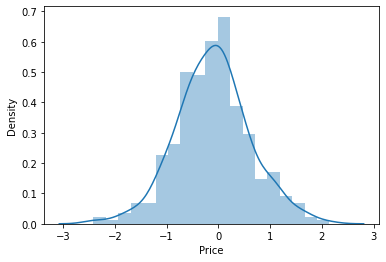

In [ ]:
predict(DecisionTreeRegressor(random_state=0))

Training score : 0.28805864761780287
RMSE: 0.5676677345002771


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


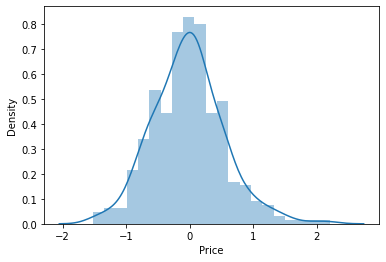

In [ ]:
predict(RandomForestRegressor(ccp_alpha=0.1,n_estimators=50, max_depth = 70))

Training score : 0.28805864761780287
RMSE: 0.6238828516927476


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


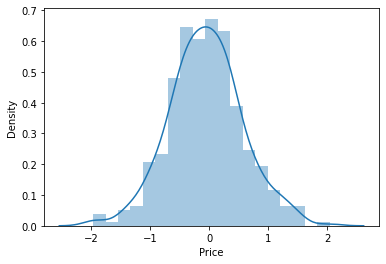

In [ ]:
predict(GradientBoostingRegressor(alpha=.9 , n_estimators=12,learning_rate=0.5, max_depth=12))

Training score : 0.28805864761780287
RMSE: 336578417144.5651


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


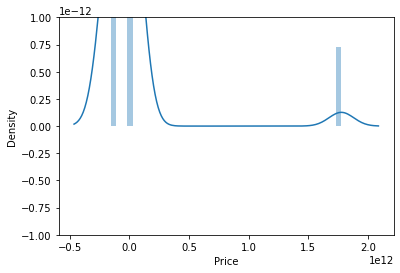

In [ ]:
predict(LinearRegression())

In [ ]:
model = RandomForestRegressor(ccp_alpha=0.1,n_estimators=50, max_depth = 70)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Training score : {}'.format(model.score(X_test, y_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training score : 0.5136934874351149
RMSE: 0.6436108058640588
